In [ ]:
!cp /content/drive/MyDrive/Code/Colab\ Notebooks/Study/PyTorch/main.py .

Step 0
loss 0.49826085567474365
loss 0.4957580268383026
loss 1.4493720531463623
loss 0.1282913088798523
loss 0.08563505858182907
loss 0.5312389731407166
loss 0.0184202678501606
loss 0.017258984968066216
loss 0.016972919926047325
loss 0.016268910840153694
loss 0.015007410198450089
loss 0.005760674364864826
loss 0.02759627439081669
loss 0.003384821815416217
loss 0.003288624109700322
loss 0.003008057828992605
loss 0.002844186034053564
loss 0.002668646862730384
loss 0.0024382355622947216
loss 0.0022370372898876667
test loss 0.0019726124592125416
Step 1
loss 0.001982737798243761
loss 0.001763917156495154
loss 0.0016599319642409682
loss 0.001580334734171629
loss 0.0015212828293442726
loss 0.0014847781276330352
loss 0.001458639046177268
loss 0.0014347038231790066
loss 0.0014012530446052551
loss 0.0013509484706446528
loss 0.001271950313821435
loss 0.0011368761770427227
loss 0.0009323833510279655
loss 0.000723202305380255
loss 0.0005016896175220609
loss 0.000338845798978582
loss 0.0002969170745

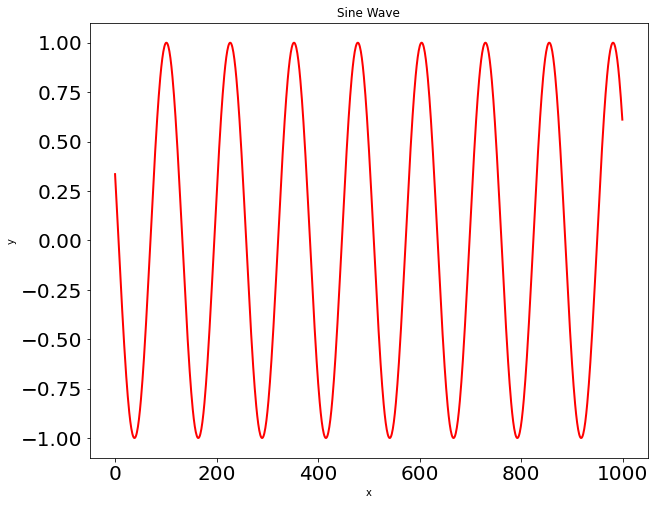

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# parameters
N = 100
L = 1000
T = 20

# data
x = np.empty((N,L), np.float32)
x[:] = np.array(range(L)) + np.random.randint(-4*T, 4*T, N).reshape(N,1)
y = np.sin(x/1.0/T).astype(np.float32)

#plot
plt.figure(figsize=(10,8))
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]), y[0,:], 'r', linewidth=2.0)
#plt.show()

# LSTM model
class LSTMPredictor(nn.Module):
    def __init__(self, n_hidden=51):
        super(LSTMPredictor, self).__init__()
        self.n_hidden = n_hidden
        #lstm1, lstm2, linear
        self.lstm1 = nn.LSTMCell(1, self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden, self.n_hidden)
        self.linear = nn.Linear(self.n_hidden,1)

    def forward(self, x,future=0):
        outputs = []
        n_samples = x.size(0)

        h_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        c_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        h_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        c_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)


        for input_t in x.split(1,dim=1):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        for i in range(future):
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        outputs = torch.cat(outputs,dim=1)
        return outputs

if __name__ == "__main__":
    train_input = torch.from_numpy(y[3:,:-1])# 97, 999
    train_target = torch.from_numpy(y[3:,1:]) # 97, 999
    test_input = torch.from_numpy(y[:3,:-1]) # 3, 999
    test_target = torch.from_numpy(y[:3,1:]) # 3, 999

    model = LSTMPredictor()
    criterion = nn.MSELoss()

    optimizer = optim.LBFGS(model.parameters(), lr=0.8)

    n_steps = 5
    for i in range(n_steps):
        print("Step", i)

        def closure():
            optimizer.zero_grad()
            out = model(train_input)
            loss = criterion(out, train_target)
            print("loss", loss.item())
            loss.backward()
            return loss 
        optimizer.step(closure)

        with torch.no_grad():
            future = 1000
            pred = model(test_input, future=future)
            loss = criterion(pred[:,:-future], test_target)
            print("test loss", loss.item())
            y = pred.detach().numpy()
        
        #plot
        plt.figure(figsize=(12,6))
        plt.title(f"Step {i+1}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        n = train_input.shape[1]
        def draw(y_i, color):
            plt.plot(np.arange(n), y_i[:n], color, linewidth=2.0)
            plt.plot(np.arange(n, n+future), y_i[n:], color + ":", linewidth=2.0)
        draw(y[0], 'r')
        draw(y[1], 'b')
        draw(y[2], 'g')

        plt.savefig("predict%d.pdf"%i)
        plt.close()


In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# parameters
N = 100
L = 1000
T = 20

# data
x = np.empty((N,L), np.float32)
x[:] = np.array(range(L)) + np.random.randint(-4*T, 4*T, N).reshape(N,1)
y = np.sin(x/1.0/T).astype(np.float32)

array([[ 0.997495  ,  0.99978375,  0.9995736 , ...,  0.8840773 ,
         0.90633106,  0.9263177 ],
       [-0.5646425 , -0.52268726, -0.47942555, ..., -0.849735  ,
        -0.822324  , -0.7928576 ],
       [ 0.9738476 ,  0.9612752 ,  0.9463001 , ...,  0.9827005 ,
         0.9907285 ,  0.9962803 ],
       ...,
       [-0.00840734, -0.05837419, -0.10819513, ...,  0.39592513,
         0.34953606,  0.3022733 ],
       [-0.39714813, -0.44252035, -0.48678672, ...,  0.00707353,
        -0.04291247, -0.09279121],
       [-0.7512804 , -0.7173561 , -0.6816388 , ..., -0.95375264,
        -0.9375376 , -0.9189793 ]], dtype=float32)